In [1]:
import yaml
import pprint
import sys

sys.path.append('C:\\Users\\a2305\\Desktop\\repository_git_dvc\\classification_with_dvc')

from src.report.visualization import plot_confusion_matrix
from src.stages.data_load import data_load
from src.stages.features_load import featurize
from src.stages.data_split import split_dataset
from src.stages.train import train_model
from src.stages.evaluation import evaluate_model

### go to project folder root

In [2]:
%cd .. 

c:\Users\a2305\Desktop\repository_git_dvc\classification_with_dvc


In [3]:
with open('params.yaml') as config_file:
    config = yaml.safe_load(config_file)

In [4]:
pprint.pprint(config)

{'base': {'random_state': 42},
 'data_load': {'raw_db': 'data/raw/raw_diabetes.csv'},
 'data_split': {'test_db': 'data/processed/test_diabetes.csv',
                'test_size': 0.2,
                'train_db': 'data/processed/train_diabetes.csv'},
 'featurize': {'featurize_db': 'data/processed/features_diabetes.csv',
               'target_column': 'target'},
 'model': {'path': 'models/model.joblib'},
 'reports': {'confusion_matrix_image': 'reports/confusion_matrix.png',
             'metrics_file': 'reports/metrics.json'},
 'train': {'cv': 3,
           'estimators': {'logreg': {'param_grid': {'C': [0.01, 0.1, 0, 1],
                                                    'max_iter': [50, 100, 200],
                                                    'multi_class': ['ovr',
                                                                    'multinomial'],
                                                    'solver': ['newton-cg',
                                                          

In [5]:
# diabetes = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Diabetes.csv')
# diabetes.rename(columns={'diabetes':'target'}, inplace=True)
# diabetes.to_csv('../data/raw/raw_diabetes.csv')
# diabetes

data_load(config_path="params.yaml")
# or
# !python src/stages/data_load.py --config=params.yaml

data_load Completato!


In [6]:
# diabetes_features = diabetes[[
#     'pregnancies', 'glucose', 'diastolic', 'triceps',
#     'insulin', 'bmi',
#     'target'
# ]]

#diabetes_features.to_csv('../data/processed/features_diabetes.csv')

featurize(config_path='params.yaml')


featurize Completato!


In [7]:
# y = diabetes['target']
# X = diabetes.drop(['target'],axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# trainset_path = '../data/processed/train_diabetes.csv'
# testset_path = '../data/processed/test_diabetes.csv'

# X_train.to_csv(trainset_path)
# X_test.to_csv(testset_path)

split_dataset(config_path='params.yaml')

data_split completato!


In [8]:


# # Define the range of values for each parameter
# C_values = 0.01  # Values from 0.001 to 1000 logarithmically
# solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# multi_class_options = ['ovr', 'multinomial']
# max_iter_values = np.random.randint(50, 500, 10)  # Random values between 50 and 500

# # Randomly select values for each parameters
# random_solver = np.random.choice(solver_options)
# random_multi_class = np.random.choice(multi_class_options)
# random_max_iter = np.random.choice(max_iter_values)

# # Create a dictionary with the randomly initialized parameters
# random_clf_params = {
#     'C': C_values,
#     'solver': random_solver,
#     'multi_class': random_multi_class,
#     'max_iter': random_max_iter
# }


# logreg = LogisticRegression(**random_clf_params, random_state=42)
# model_path = ('../models/model.joblib')
# joblib.dump(logreg, model_path)

# logreg.fit(X_train,y_train)

# # Step 7 : predict model
# y_pred = logreg.predict(X_test)


train_model(config_path='params.yaml')

Fitting 3 folds for each of 9 candidates, totalling 27 fits


train Completato!


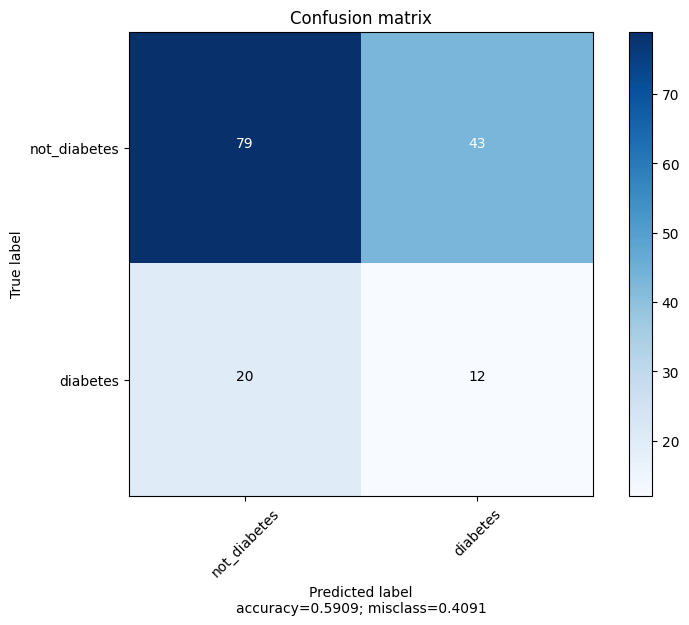

In [9]:
# cm = confusion_matrix(y_test,y_pred)
# cm_plot = plot_confusion_matrix(cm, target_names=['not_diabetes','diabetes'], normalize=False)
# accuracy_score(y_test,y_pred)
# print(classification_report(y_test,y_pred))
# f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
# accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
# loss = log_loss(y_true=y_test, y_pred=y_pred)

# metrics_file = '../reports/metrics.json'

# metrics = {
#     'f1': f1,
#     'accuracy': accuracy,
#     'loss': loss
# }

# with open(metrics_file, 'w') as mf:
#     json.dump(
#         obj=metrics,
#         fp=mf,
#         indent=4
#     )
# # Save confusion matrix image
# confusion_matrix_image = '../reports/confusion_matrix.png'
# cm_plot.savefig(confusion_matrix_image)

evaluate_model(config_path='params.yaml')